In [1]:
from collections import defaultdict
import math
import numpy as np
from numpy import ma
import datetime, time
from datetime import datetime
import netCDF4
from netCDF4 import Dataset, num2date
from scipy.interpolate import griddata

import matplotlib.pyplot as plt
plt.style.use('ggplot')
% matplotlib inline

import os
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from scipy.spatial import Delaunay
import pickle

import halem
import halem.Mesh_maker as Mesh_maker
import halem.Calc_path as Calc_path
import halem.Functions as Functions

import datetime, time
import platform


import simpy

import shapely.geometry
from simplekml import Kml, Style

import numpy as np

timeQ = time

In [2]:
name_textfile_load = 'D:/Roadmaps/Rm_DCSM_FM_05nm_WDmin=1.5,nl=(0.9, 1)_idx'

with open(name_textfile_load, 'rb') as input:
    Roadmap = pickle.load(input)

## shows variable speed

t0 = '01/07/2013 20:00:00'
start = (53.051185, 5.053046)
stop = (53.331927, 5.125379)

vmax = 5

In [3]:
## mooiste plaatje ooit

t0 = '01/07/2013 16:00:00'
start = (52.979669, 4.755589)
stop = (53.331927, 5.125379)

vmax = 5

## vaart niet over eilanden

t0 = '01/07/2013 23:50:00'
start = (53.176232, 5.397849)
stop = (53.280218, 4.939846)
#stop = (53.442070, 5.385254)


vmax = 5

In [6]:
path_t, time_t, dist_t = halem.HALEM_time(start[::-1], stop[::-1], t0, vmax, Roadmap)
path_s, time_s, dist_s = halem.HALEM_space(start[::-1], stop[::-1], t0, vmax, Roadmap)
path_c, time_c, dist_c = halem.HALEM_cost(start[::-1], stop[::-1], t0, vmax, Roadmap)

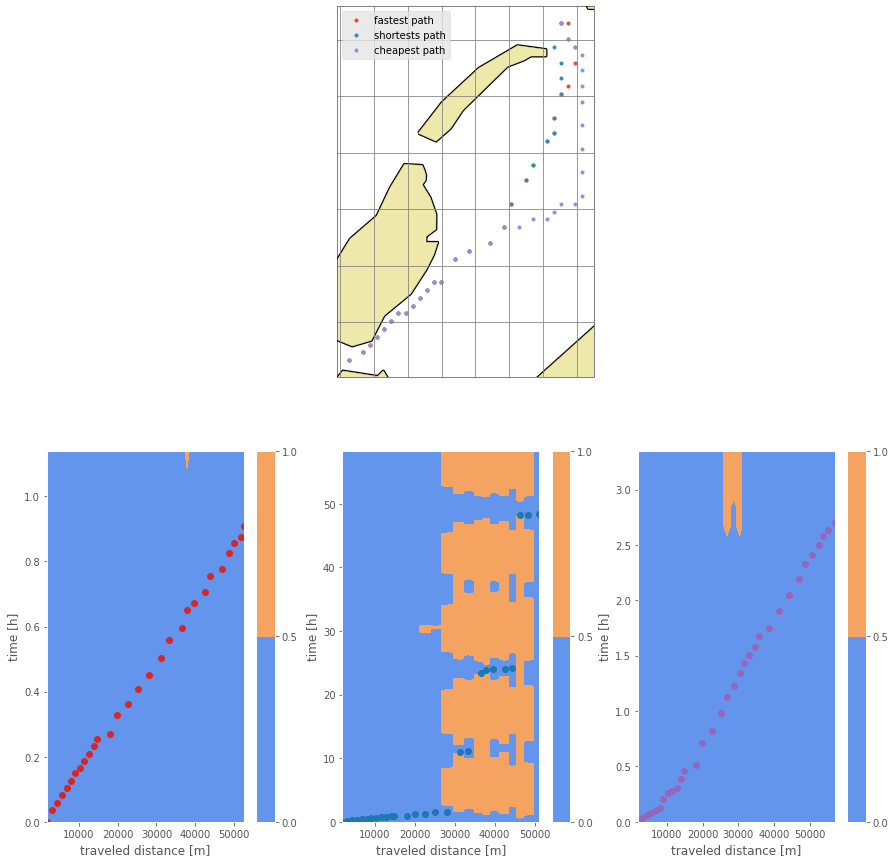

In [7]:
fig = plt.figure(figsize = (15,15))
ax = plt.subplot(211, projection=ccrs.Mercator())
ax.coastlines(resolution='10m', color='black', linewidth=3)
ax.gridlines(color = 'grey', zorder = 3)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face', facecolor='palegoldenrod'))

plt.plot(path_t[:,0], path_t[:,1],'.', transform=ccrs.PlateCarree(), label = 'fastest path')
plt.plot(path_s[:,0], path_s[:,1],'.', transform=ccrs.PlateCarree(), label = 'shortests path')
plt.plot(path_c[:,0], path_c[:,1],'.', transform=ccrs.PlateCarree(), label = 'cheapest path')
plt.legend(loc='best')

ax = plt.subplot(234)
halem.plot_timeseries2(path_t, time_t, Roadmap, Color = 'tab:red')

ax = plt.subplot(235)
halem.plot_timeseries2(path_s, time_s, Roadmap, Color = 'tab:blue')

ax = plt.subplot(236)
halem.plot_timeseries2(path_c, time_c, Roadmap, Color = 'tab:purple')
plt.show()